In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import upsetplot

In [2]:
df = pd.read_csv("specialized_functions_derep.tsv", sep="\t")
df_env = pd.read_csv("../env_corr/taxon_countries.tsv", sep="\t")
df_ptu = pd.read_csv(
    "../ptu_derep/derep_plasmids_clusters_with_ptu_ids.tsv",
    sep="\t",
    header=None,
    index_col=0,
)

ptu_mapping = {}

for idx in df_ptu.index:
    for plasmid in df_ptu.loc[idx, 2].split(","):
        ptu_mapping[plasmid] = idx
df.head()

,Plasmid,attribute,taxon_oid
0,2162886015|FOassembled-_contig00007,AMP,2162886015
1,3300000364|INPhiseqgaiiFebDRAFT_100802549,AMP,3300000364
2,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,AMP,3300000519
3,3300001915|JGI24741J21665_1000312,AMP,3300001915
4,3300001989|JGI24739J22299_10001785,AMP,3300001989


In [3]:
df = df.join(df_env.set_index("taxon_oid"), on="taxon_oid")
df["PTU"] = df["Plasmid"].map(ptu_mapping)


In [4]:
df["Plasmid"].nunique()

5828

In [5]:
df["PTU"].nunique()

3825

In [6]:
df_mob = pd.read_csv("../conjscan/plasmid_conj_types.tsv", sep="\t", index_col=0)
df_mob.head()

,MOB,CONJ,dCONJ,oriT,origin,length,type
Plasmid,,,,,,,
2088090015|GPICI_8721071,1,0,0,0,Meta,9738,MOB
2088090015|GPICI_8837489,1,0,0,0,Meta,10843,MOB
2088090015|GPICI_8880022,1,0,0,0,Meta,25248,MOB
2088090015|GPICI_8946463,1,0,0,0,Meta,9983,MOB
2088090015|GPICI_9100369,1,0,0,0,Meta,9763,MOB


In [7]:
a = df.groupby("Plasmid")["attribute"].apply(list).reset_index()
a["num_attributes"] = a["attribute"].apply(lambda x: len(x))
a["attribute"] = a["attribute"].apply(lambda x: ",".join(x))
a = a.join(df_mob["type"], on="Plasmid")
a

,Plasmid,attribute,num_attributes,type
0,2124908023|SwBS_Contig_18,Resistance,1,Unknown
1,2124908023|SwBS_Contig_2248,Resistance,1,NaN
2,2162886007|SwRhRL2b_contig_1567849,BGC,1,CONJ
3,2162886015|FOassembled-_contig00007,AMP,1,Unknown
4,2162886015|FOassembled-_contig00011,BGC,1,Unknown
...,...,...,...,...
5823,Refsoil_NZ_HG916853.1,BGC,1,CONJ
5824,Refsoil_NZ_HG916854.1,BGC,1,Unknown
5825,Refsoil_NZ_HG916855.1,"Resistance,BGC",2,CONJ
5826,Refsoil_NZ_HG938354.1,"AMP,Resistance,BGC",3,Unknown


In [8]:
plasmid_attributes = upsetplot.from_memberships(a.attribute.str.split(","), data=a)
plasmid_attributes


Plasmid  \
AMP   BGC   Resistance                                        
False False True                  2124908023|SwBS_Contig_18   
            True                2124908023|SwBS_Contig_2248   
      True  False        2162886007|SwRhRL2b_contig_1567849   
True  False False       2162886015|FOassembled-_contig00007   
False True  False       2162886015|FOassembled-_contig00011   
...                                                     ...   
            False                     Refsoil_NZ_HG916853.1   
            False                     Refsoil_NZ_HG916854.1   
            True                      Refsoil_NZ_HG916855.1   
True  True  True                      Refsoil_NZ_HG938354.1   
False True  False                     Refsoil_NZ_HG938357.1   

                                 attribute  num_attributes     type  
AMP   BGC   Resistance                                               
False False True                Resistance               1  Unknown  
            True                Resistance               1      NaN  
      True  False                      BGC               1     CONJ  
True  False False                      AMP               1  Unknown  
False True  False                      BGC               1  Unknown  
...                                    ...             ...      ...  
            False                      BGC               1     CONJ  
            False                      BGC               1  Unknown  
            True            Resistance,BGC               2     CONJ  
True  True  True        AMP,Resistance,BGC               3  Unknown  
False True  False                      BGC               1     CONJ  

[5828 rows x 4 columns]

In [9]:
plasmid_attributes["type_2"] = plasmid_attributes["type"].apply(
    lambda x: "Transferrable" if x != "Unknown" else x
)

/clusterfs/jgi/groups/science/homes/mbfiamenghi/.micromamba/envs/geo/lib/python3.12/site-packages/upsetplot/plotting.py:662: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['black' '#0000002e' '#0000002e' '#0000002e' 'black' '#0000002e'
 '#0000002e' '#0000002e' 'black' 'black' '#0000002e' 'black' 'black'
 'black' '#0000002e' '#0000002e' 'black' 'black' 'black' 'black' 'black']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  styles["edgecolor"].fillna(styles["facecolor"], inplace=True)
/clusterfs/jgi/groups/science/homes/mbfiamenghi/.micromamba/envs/geo/lib/python3.12/site-packages/upsetplot/plotting.py:663: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'solid' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  styles["linestyle"].fillna("solid", inplace=True)


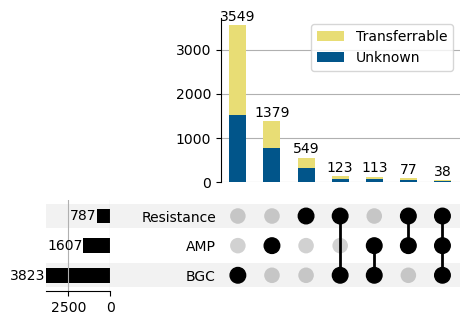

In [10]:
plot = upsetplot.UpSet(
    plasmid_attributes,
    show_counts=True,
    sort_by="cardinality",
    intersection_plot_elements=0,
)
plot.add_stacked_bars(by="type_2", elements=5, colors=["#E8DD75", "#01558A"])
plot.plot()
plt.savefig("../figures/specialized_attributes.pdf", bbox_inches="tight")

In [12]:
# fisher test for bgc transferrable
def calc_fisher(attribute):
    plasmid_attributes_reset = plasmid_attributes.reset_index()
    attribute_transferrable = plasmid_attributes_reset[
        (plasmid_attributes_reset["type_2"] == "Transferrable")
        & (plasmid_attributes_reset[attribute] == True)
    ].shape[0]

    attribute_not_transferrable = plasmid_attributes_reset[
        (plasmid_attributes_reset["type_2"] != "Transferrable")
        & (plasmid_attributes_reset[attribute] == True)
    ].shape[0]

    other_specialized_transferrable = plasmid_attributes_reset[
        (plasmid_attributes_reset["type_2"] == "Transferrable")
        & (plasmid_attributes_reset[attribute] == False)
    ].shape[0]

    other_specialized_not_transferrable = plasmid_attributes_reset[
        (plasmid_attributes_reset["type_2"] != "Transferrable")
        & (plasmid_attributes_reset[attribute] == False)
    ].shape[0]

    table_fisher = [
        [attribute_transferrable, other_specialized_transferrable],
        [attribute_not_transferrable, other_specialized_not_transferrable],
    ]

    from scipy.stats import fisher_exact
    from scipy.stats.contingency import odds_ratio

    print("fisher results for", attribute)
    print(fisher_exact(table_fisher, alternative="greater"))
    print(np.log10(odds_ratio(table_fisher).statistic))
    return fisher_exact(table_fisher, alternative="greater").pvalue

In [13]:
ps = {}
for attribute in ["BGC", "Resistance", "AMP"]:
    ps[attribute] = calc_fisher(attribute)

from scipy.stats import false_discovery_control

false_discovery_control(list(ps.values()))

fisher results for BGC
SignificanceResult(statistic=1.6321461973344595, pvalue=5.5639175277399265e-19)
0.21272219163825828
fisher results for Resistance
SignificanceResult(statistic=0.6474784759987235, pvalue=0.9999999933921574)
-0.18874224293305258
fisher results for AMP
SignificanceResult(statistic=0.6583486206576259, pvalue=0.9999999999995342)
-0.18151272508930272


array([1.66917526e-18, 1.00000000e+00, 1.00000000e+00])

In [14]:
a[a["num_attributes"] > 1]

,Plasmid,attribute,num_attributes,type
7,3300000519|RepKanNP_Acetate_BrdU_F21BDRAFT_100...,"Resistance,BGC",2,Unknown
43,3300003320|rootH2_10000153,"AMP,BGC",2,Unknown
50,3300003322|rootL2_10004270,"AMP,BGC",2,Unknown
70,3300005260|Ga0074072_1000057,"Resistance,BGC",2,CONJ
76,3300005289|Ga0065704_10070156,"Resistance,BGC",2,CONJ
...,...,...,...,...
5818,Refsoil_NZ_CP007702.1,"AMP,Resistance",2,CONJ
5819,Refsoil_NZ_CP007703.1,"AMP,Resistance",2,Unknown
5820,Refsoil_NZ_CP007796.1,"Resistance,BGC",2,Unknown
5825,Refsoil_NZ_HG916855.1,"Resistance,BGC",2,CONJ


In [15]:
import duckdb

with duckdb.connect("../soil_plasmid.db") as con:
    conj_types = con.sql("SELECT * FROM conj_types").df()


In [16]:
a = a.join(conj_types.set_index("Plasmid")["length"], on="Plasmid")
a

,Plasmid,attribute,num_attributes,type,length
0,2124908023|SwBS_Contig_18,Resistance,1,Unknown,23542.0
1,2124908023|SwBS_Contig_2248,Resistance,1,NaN,NaN
2,2162886007|SwRhRL2b_contig_1567849,BGC,1,CONJ,113293.0
3,2162886015|FOassembled-_contig00007,AMP,1,Unknown,69792.0
4,2162886015|FOassembled-_contig00011,BGC,1,Unknown,63817.0
...,...,...,...,...,...
5823,Refsoil_NZ_HG916853.1,BGC,1,CONJ,151687.0
5824,Refsoil_NZ_HG916854.1,BGC,1,Unknown,759787.0
5825,Refsoil_NZ_HG916855.1,"Resistance,BGC",2,CONJ,1932030.0
5826,Refsoil_NZ_HG938354.1,"AMP,Resistance,BGC",3,Unknown,1807065.0


In [17]:
a[a["type"] != "Unknown"]["length"].mean()

126328.11250748055

In [18]:
a[a["type"] == "Unknown"]["length"].mean()

98719.21245551601

In [19]:
from scipy.stats import mannwhitneyu

mannwhitneyu(
    a[a["type"] != "Unknown"]["length"],
    a[a["type"] == "Unknown"]["length"],
    nan_policy="omit",
    alternative="greater",
)

MannwhitneyuResult(statistic=2865196.5, pvalue=2.263494981654121e-35)